In [1]:
import torch
import numpy as np
import pandas as pd
from models_A import preprocessing_from_matlab
from scipy.io.matlab import loadmat
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from models_A import ModelA, ModelAN
from seaborn import set_theme

In [2]:
states_mat = loadmat("../../../../xs_all.mat")
forces_mat = loadmat("../../../../tau_all.mat")

In [3]:
random_force_denorm = forces_mat["tau_all"][900][0].T
pd.DataFrame(random_force_denorm)

,0,1,2,3
0,21.582000,0.000000,0.000000,0.000000e+00
1,28.842000,0.000000,0.000000,-2.500000e-01
2,28.842000,-0.039572,0.808561,-2.500000e-01
3,28.812944,-0.039608,0.808406,-2.489069e-01
4,28.783856,-0.039306,0.716864,-2.477922e-01
...,...,...,...,...
19996,21.584105,-0.000052,0.000027,-8.446511e-07
19997,21.584105,-0.000052,0.000027,-8.434722e-07
19998,21.584105,-0.000052,0.000027,-8.422898e-07
19999,21.584105,-0.000052,0.000027,-8.411041e-07


In [4]:
states, states_norms = preprocessing_from_matlab(states_mat)
forces, forces_norms = preprocessing_from_matlab(forces_mat)

In [5]:
random_state, random_state_norm = states[900], states_norms[900]
random_force, random_force_norm = forces[900], forces_norms[900]

In [6]:
model = ModelA()
model.load_state_dict(torch.load("model.pt"))
model_norms = ModelAN()
model_norms.load_state_dict(torch.load("model_norms.pt"))

<All keys matched successfully>

In [7]:
model.eval()
with torch.inference_mode():
    normalized_forces = model(torch.tensor(random_state, dtype=torch.float32))

In [8]:
model_norms.eval()
with torch.inference_mode():
    forces_norms = model_norms(torch.tensor(random_state_norm, dtype=torch.float32))

In [9]:
forces = []
for i in range(normalized_forces.shape[-1]):
    force_denorm = normalized_forces[:,i]*forces_norms[i]
    force_denorm = force_denorm.numpy()
    forces.append(force_denorm)
forces = np.array(forces).T

In [10]:
pd.DataFrame(forces).T.to_csv("forces_complete.csv", index=False, header=False)

In [1]:
cm=1/2.54
t = np.linspace(0,20001,20001)
plt.style.use("ggplot")
plt.rcParams["font.family"] = "serif"
fig, axs = plt.subplots(4,1, figsize=(16*cm,24.7*cm))

for i, ax in enumerate(axs.flatten()):
    ax.plot(t, forces[:,i], label="Pred")
    ax.plot(t, random_force_denorm[:,i], label="Real", ls="-.")
    ax.set_xlabel("Time")
    ax.set_ylabel(f"$U_{i+1}$")
    ax.ticklabel_format(style="sci",
                        scilimits=(0,0),
                        useMathText=True,
                        axis="x")
    ax.legend()

fig.tight_layout()
fig.savefig("../../../report/figures/4results/uav/forces_denormalized.pgf", backend="pgf")

NameError: name 'np' is not defined

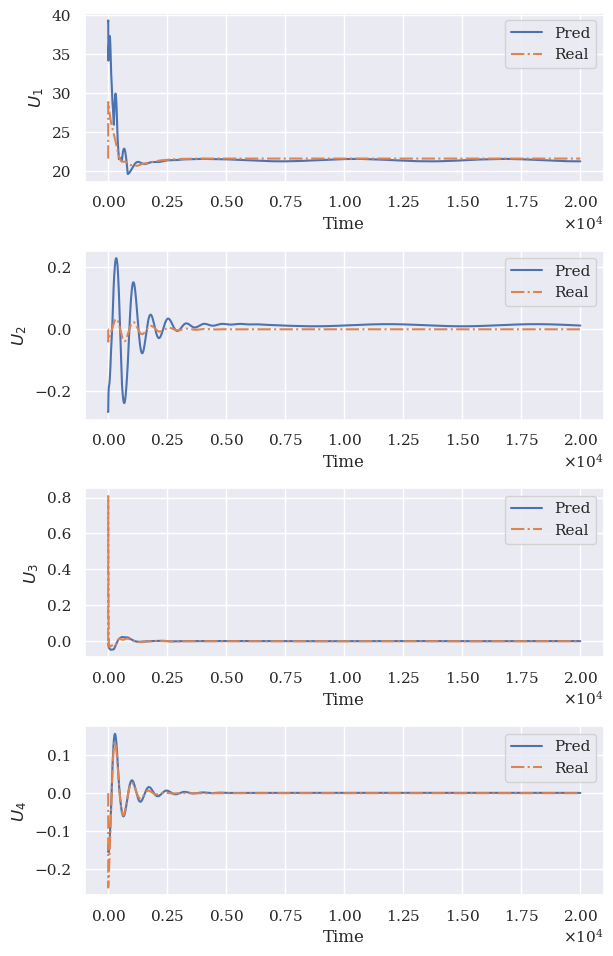

In [12]:
cm=1/2.54
t = np.linspace(0,20001,20001)
plt.style.use("ggplot")
plt.rcParams["font.family"] = "serif"
fig, axs = plt.subplots(4,1, figsize=(16*cm,24.7*cm))
correction = [-20, 0, 0, 0]

for i, ax in enumerate(axs.flatten()):
    ax.plot(t, forces[:,i]+correction[i], label="Pred")
    ax.plot(t, random_force_denorm[:,i], label="Real", ls="-.")
    ax.set_xlabel("Time")
    ax.set_ylabel(f"$U_{i+1}$")
    ax.ticklabel_format(style="sci",
                        scilimits=(0,0),
                        useMathText=True,
                        axis="x")
    ax.legend()

fig.tight_layout()
fig.savefig("../../../report/figures/4results/uav/forces_denormalized_correction.pgf", backend="pgf")